### Codio Activity 15.10: Comparing Gradient Descent to Stochastic Gradient Descent

**Expected Time = 60 minutes** 

**Total Points = 40** 

This activity focuses on comparing the convergence and speed of gradient descent and stochastic gradient descent.  First, you will use a synthetic dataset to explore the convergence with naive implementations.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
import warnings
warnings.simplefilter(action='ignore')

### Functions and Data

Below you are given an `mse` and `df` functions for computing the gradient descent update.  Also, a simple linear dataset is built around the line $y = 3x$ with gaussian noise added.  You are to explore the convergence behavior of both stochastic gradient descent and gradient descent to the "true" coefficient $\beta_0 = 3$. 

In [2]:
#synthetic dataset y = 3x
np.random.seed(42)
X = pd.DataFrame(np.linspace(0, 10, 100))
y = 3*X + np.random.normal(scale = 5, size = 100).reshape(-1, 1)

In [3]:
#mean squared error function
def mse(theta, X = X, y = y):
    return np.mean((y - theta*X)**2)

In [4]:
#derivative function for mse
def df(theta, X = X, y = y):
    return (mse(theta + 0.001, X = X, y = y) - mse(theta,X = X, y = y))/0.001

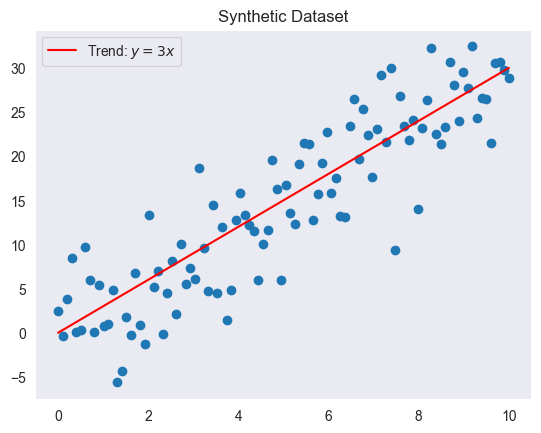

In [5]:
#dataset and "true" line
xs = np.linspace(0, 10, 100)
plt.scatter(X, y)
plt.plot(xs, 3*xs, color = 'red', label = r'Trend: $y = 3x$')
plt.title('Synthetic Dataset')
plt.grid()
plt.legend();

[Back to top](#-Index)

### Problem 1

#### Gradient Descent

**10 Points**

Below, complete the update to determine `theta_next` using gradient descent and a step size of 0.001.  Note to leave the `%time` magic command that will time your final execution of the loop.

CPU times: total: 0 ns
Wall time: 0 ns
[2.9395105740065013, 2.939510401596472, 2.9395102407384925, 2.9395100906585334, 2.939509950634438]


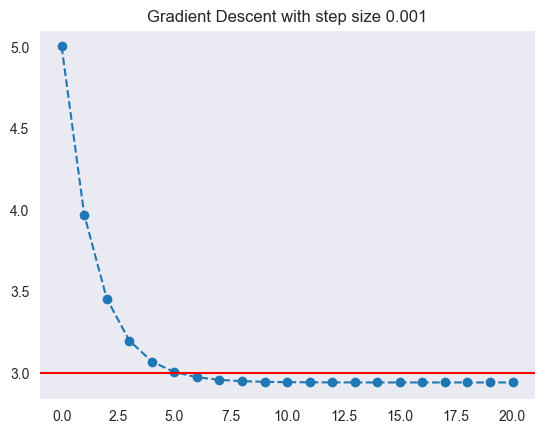

In [6]:
### GRADED
%time
thetas = [5]
for i in range(200):
    # complete the gradient descent update
    theta_next = ''
    #thetas.append(theta_next.values[0])
    
# YOUR CODE HERE
thetas = [5]
for i in range(200):
    # complete the gradient descent update
    theta_next = thetas[-1] - 0.001*df(theta = thetas[-1])
    thetas.append(theta_next.values[0])

### ANSWER CHECK
print(thetas[-5:])
plt.plot(thetas[::10], '--o')
plt.axhline(3, color = 'red')
plt.grid()
plt.title('Gradient Descent with step size 0.001');

[Back to top](#-Index)

### Problem 2

#### SGD implementation

**10 Points**

Below, complete the gradient descent update using SGD where the sample is determined by the variable `x_sample`.  Use this and `y_sample` to compute the update and append this to `thetas_sgd`. Note the execution time.

CPU times: total: 0 ns
Wall time: 0 ns


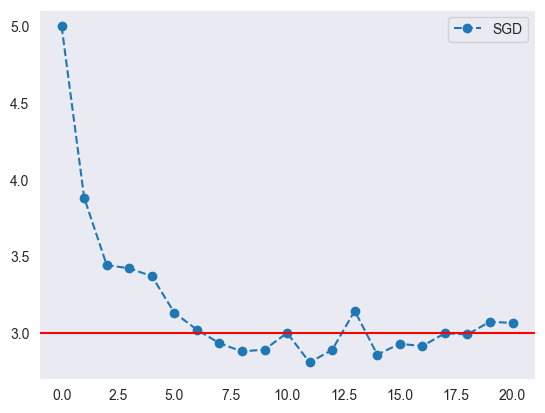

In [7]:
### GRADED
%time
thetas_sgd = [5]
for i in range(200):
    x_sample = X.sample(1, random_state = i)
    y_sample = y.iloc[x_sample.index.values]
    #complete the gradient descent update
    
    
    #thetas_sgd.append(theta_next.values[0])
    
# YOUR CODE HERE
thetas_sgd = [5]
for i in range(200):
    x_sample = X.sample(1, random_state = i)
    y_sample = y.iloc[x_sample.index.values]
    x_next = thetas_sgd[-1] - 0.001*df(theta = thetas_sgd[-1], X = x_sample, y = y_sample)
    thetas_sgd.append(x_next.values[0])

### ANSWER CHECK
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

[Back to top](#-Index)

### Problem 3

#### Comparing Convergence

**10 Points**

Below, examine the plot comparing our SGD vs. Gradient Descent implementations.  Which of the following seems to be true?

```
a. Both methods converge and took similar time
b. Both methods converge but SGD is much faster
c. Neither method converged
d. Only SGD converged.
```

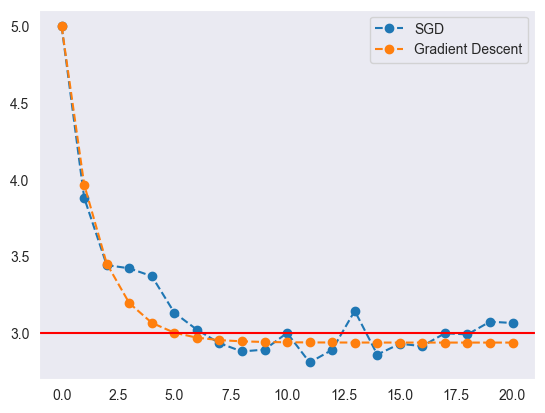

In [8]:
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.plot(thetas[::10], '--o', label = 'Gradient Descent')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

In [9]:
### GRADED
ans3 = ''
# YOUR CODE HERE
ans3 = 'a'

### ANSWER CHECK
print(ans3)

a


[Back to top](#-Index)

### Problem 4

#### Why isn't `SGD` faster?

**10 Points**

It may have surprised you that using the SGD approach did not result in much of a speed difference.  This is mainly due to the size of the array and scale of the problem.  As stated in the scikitlearn `SGDRegressor` user guide [here](https://scikit-learn.org/stable/modules/sgd.html#regression), SGD will usually require a larger number of observations to be noticeably faster.  How many samples does `sklearn` suggest this is?

```
a. > 1000
b. > 10,000
c. > 100,000
d. > 1,000,000
```

In [10]:
### GRADED
ans4 = ''
# YOUR CODE HERE
ans4 = 'b'

### ANSWER CHECK
print(ans4)

b
